# Exercise Set 7: Jacob Cardinal Tremblay, Charchit Kumar Sethi, and Sachin Pradeep Etakkepravan Thulicheri

Due: **9:30 23 May 2022**

Discussion: **13:00 27 May 2022**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_4593683.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import itertools

# 1. Kendall's tau coefficient [40 Points]

In statistics, the Kendall rank correlation coefficient, commonly referred to as Kendall’s tau coefficient (after the Greek letter $\tau$), is a statistic used to measure the ordinal association between two measured quantities. A tau test is a non-parametric hypothesis test for statistical dependence based on the tau coefficient. Spearman’s rank correlation is satisfactory for testing a null hypothesis of independence between two variables but it is difficult to interpret when the null hypothesis is rejected. Kendall’s rank correlation improves upon this by reflecting the strength of the dependence between the variables being compared.

Consider two samples, $x$ and $y$, each of size $n$. The total number of possible pairings of $x$ with $y$ observations is $\frac{n(n-1)}{2}$. Now consider pairs of ordered observations $(x_i, y_i)$ and $(x_j, y_j)$ with $i=1,\ldots n-1$ and $j=i+1,\ldots, n$. Then $x_1 \leq x_2 \leq \ldots \leq x_n$. Now pair $1$ is compared with every other pair $(2,3,,,n)$, Pair $2$ with all following pairs $(3,4,,,n)$ and so on. In total $\frac{n(n-1)}{2}$ pairs are compared. If for a pair:

- $x_i<x_j$ and $y_i<y_j$, it is concordant
- $x_i<x_j$ and $y_i>y_j$, it is disconcordant
- $x_i \ne x_j$ and $y_i=y_j$, it has a binding in $Y$
- $x_i = x_j$ and $y_i\ne y_j$, it has a binding in $X$
- $x_i = x_j$ and $y_i=y_j$, it has a binding in $X$ and $Y$

\newpage

The number of pairs that are:

- concordant are $C$
- disconcordant are $D$
- having a binding in $Y$ are $T_Y$
- having a binding in $X$ are $T_X$
- having a binding in $X$ and $Y$ are $T_{XY}$

Kendall's tau value compares the number of concordant and disconcordant pairs:

$\tau = \dfrac{C-D}{\sqrt{(C+D+T_X)(C+D+T_Y)}}$

The denominator is the total number of pair combinations, so the coefficient must be in the range $-1 \leq \tau \leq 1$. If the agreement between the two rankings is perfect (when the two rankings are the same) the coefficient has value $1$. If the disagreement between the two rankings is perfect (when one ranking is the reverse of the other) the coefficient has value $-1$.

Use the data file `hubble.dat`, which includes dataset $x$ in the first column and dataset $y$ in the second column.

**a.** Take the data and reorder it such that $x_1 \leq x_2 \leq \ldots \leq x_n$. **10 Points**

In [1]:
#reading the data and I Named the column x and y 
data=pd.read_csv("C:/Users/psach/Desktop/Bonn/SoSe 2022/Data Analysis/Ex7/hubbledat.sec",delimiter="\s+",header=None,index_col=None,names=["x","y"])
# print(data)
# Creating a data frame which only contain the sorted x values in ascending order from our datafile 
x_sorted = data.sort_values(["x"], ascending=True,ignore_index=True)
print(x_sorted)
# Separating the sorted x values and the y values from the datafile
x=x_sorted.filter(['x'])
y=x_sorted.filter(['y'])
# print(x,y)


       x       y
0   0.03   -83.3
1   0.04   111.1
2   0.19    97.2
3   0.25    27.8
4   0.26  -208.3
5   0.27   -69.4
6   0.42   819.4
7   0.50   819.4
8   0.50   958.3
9   0.63   666.7
10  0.79   777.8
11  0.88   888.9
12  0.89   194.4
13  0.89   430.6
14  0.91  1222.2
15  1.01  1736.1
16  1.10  1472.2
17  1.11  1166.7
18  1.42  1263.9
19  1.70  2111.1
20  2.01  1611.1
21  2.02  1763.9
22  2.02  1111.1
23  2.02  2250.0


**b.** Compute the number of concordant pairs $C$, disconcordant pairs $D$, bound pairs $T_X$, $T_Y$, and $T_{XY}$. **10 Points**

## Code for Concordant pairs $C$

In [2]:
from itertools import combinations                 
x=x_sorted.filter(['x'])
# coverting our 1-d array into 2-d array 
x=np.array(x).flatten()
y=x_sorted.filter(['y'])
y=np.array(y).flatten()
# creating the list for the desired combinations
a=list(combinations(x,2))
b=list(combinations(y,2))
# implementing the conditions for the concordant pairs
p=["a<b" if a<b else ("a>b" if a>b else "a=b")for a,b in combinations(x,2)]
# print(list(p).count("a<b"))
q=["a<b" if a<b else ("a>b" if a>b else "a=b")for a,b in combinations(y,2)]
# print(list(q).count("a>b"))
# Zipping the p and q for getting the concordant pairs
r=zip(p,q)
# print(tuple(r))
# here s gives us our dessired pairs for which we created the list a and b
s=[1 if (v1=="a<b" and v2=="a<b") else 0 for v1,v2 in r]
# Calculating all the concordant pairs in our datafile
C= sum(s)
print("Total Number of Concordant pairs C is:",C)

Total Number of Concordant pairs C is: 225


## Code for Disconcordant pairs $D$

In [3]:
# defining the conditions for the disconcordant pairs 
p=["a<b" if a<b else ("a>b" if a>b else "a=b")for a,b in combinations(x,2)]
q=["a<b" if a<b else ("a>b" if a>b else "a=b")for a,b in combinations(y,2)]
r=zip(p,q)
s=[1 if (v1=="a<b" and v2=="a>b") else 0 for v1,v2 in r]
D = sum(s)
print("Total Number of Disconcordant pairs C is:",D)

Total Number of Disconcordant pairs C is: 45


## Code for Bound pairs $T_X$

In [4]:
# defining the conditions for binding in x
p=["a<b" if a<b else ("a>b" if a>b else "a=b")for a,b in combinations(x,2)]
q=["a<b" if a<b else ("a>b" if a>b else "a=b")for a,b in combinations(y,2)]
r=zip(p,q)
s=[1 if (v2!="a=b" and v1=="a=b") else 0 for v1,v2 in r]
T_x = sum(s)
print(T_x)

5


**Total Number of Bound pairs $T_X$=5**

## Code for Bound pairs $T_Y$

In [5]:
# defining the conditions for binding in y
p=["a<b" if a<b else ("a>b" if a>b else "a=b")for a,b in combinations(x,2)]
q=["a<b" if a<b else ("a>b" if a>b else "a=b")for a,b in combinations(y,2)]
r=zip(p,q)
s=[1 if (v1!="a=b" and v2=="a=b") else 0 for v1,v2 in r]
T_y = sum(s)
print(T_y)

1


**Total Number of Bound pairs $T_Y$=1**

## Code for Bound pairs $T_{XY}$

In [6]:
# defining the conditions for binding in x and y
p=["a<b" if a<b else ("a>b" if a>b else "a=b")for a,b in combinations(x,2)]
q=["a<b" if a<b else ("a>b" if a>b else "a=b")for a,b in combinations(y,2)]
r=zip(p,q)
s=[1 if (v2=="a=b" and v1=="a=b") else 0 for v1,v2 in r]
T_xy = sum(s)
print(T_xy)

0


**Total Number of Bound pairs $T_{XY}$=0**

**c.** Compute $\tau$. **10 Points**

In [7]:
tau=(C-D)/np.sqrt((C+D+T_x)*(C+D+T_y))
print(tau)

0.6593583535858748


Kendall's tau value is given by:

$\tau = \dfrac{C-D}{\sqrt{(C+D+T_X)(C+D+T_Y)}}\longrightarrow0.6593583535858748$

* Other way of calculating $\tau$ by using scipy.stats

In [8]:
from scipy.stats import kendalltau
import pickle
corr, _ = kendalltau(x, y)
print( corr)

0.6593583535858745


* Argument:- I have calculated the $\tau$ from both using the formula given in the question and by using the scipy.stats and both gave me the same result. So this is the prove for our $\tau$ value.

**d.** How should the derived $\tau$ be interpreted (what does it tell about the two datasets)? Plot the dataset $x$ vs. $y$ and compare it with $\tau$ **10 Points**

Text(0, 0.5, 'Y')

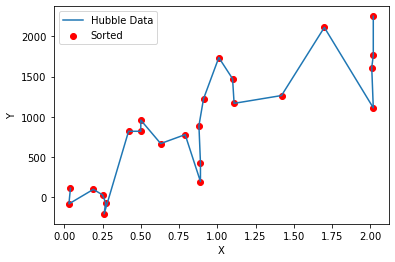

In [9]:
import matplotlib.pyplot as plt
x1=data.x
y1=data.y
x=x_sorted.filter(['x'])
x=np.array(x).flatten()

y=x_sorted.filter(['y'])
y=np.array(y).flatten()
plt.plot(x1,y1,label='Hubble Data')
plt.scatter(x,y,color="red",label='Sorted')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

* Argument:- The $\tau$ value of 66 percent shows clear dependence between the variables x and y. In the plot above the blue line is used to represent the orignal hubble data provided and the red points are the sorted data points. Its clear that by rearranging the points the correlation is not lost.

# 2. Permutation tests [40 Points]

This exercise uses the data file `4point2.dat`. The data in the file are 20 uncorrelated $(x,y)$ pairs, followed by 20 correlated pairs.

In [3]:
#Import Data
data = pd.read_table("C:/Users/jacob/Desktop/BCGS/Courses/Semester 2/Data Analysis/Exercise 7/4point2dat.sec", delimiter=',', header = None)
data.columns = ['x','y']

#Create new dataframes with only the uncorrelated data
uncorr_datax = data.x[:20]
uncorr_datay = data.y[:20]

#Create new dataframes with only the correlated data
corr_datax = data.x[20:]
corr_datay = data.y[20:]

**a.** Take the uncorrelated pairs $(x,y)$ and compute the values for the Kendall and Spearman rank correlation coefficients and the Peason/Fischer r correlation coefficient. Why are they different? **20 Points**
 
 > (This is a good example why we should not blindly rely on the Peason's correlation coefficient)

In [4]:
#Spearman rank correlation
src = sp.spearmanr(uncorr_datax, uncorr_datay)
print('The Spearman rank correlation coefficiient is: ' + str(src))
#Kendall rank correlation
krc = sp.kendalltau(uncorr_datax, uncorr_datay)
print('The Kendall rank correlation coefficient is: ' + str(krc))
#Pearson/Fischer r correlation
pfrc = sp.pearsonr(uncorr_datax, uncorr_datay)
print('The Pearson/Fischer r correlation coefficient is: ' + str(pfrc))

The Spearman rank correlation coefficiient is: SpearmanrResult(correlation=-0.08270676691729321, pvalue=0.7288508763559796)
The Kendall rank correlation coefficient is: KendalltauResult(correlation=-0.06315789473684211, pvalue=0.7246362205272814)
The Pearson/Fischer r correlation coefficient is: (0.486655219329383, 0.029557582429949155)


Here we see that each of these values are different. This is because they are different mathematical correlation tests. The largest difference is cleary between the spearman/kendall correlation coefficients and the Pearson/Fischer correlation. This is because the Pearson correlation is only applicable under a number of specific assumptions which are different than the ones for the Pearson/Fischer correlation. The Pearson correlation assumes a normally distributed, continuous data, and cannot handle outliers, whereas the Kendall correlation is non-parametric and does not require continuous data. The Pearson correlation measures a linear relationship between the variables, whereas the Spearman and Kendall correlation measure the monotonic relationship. We also see a slight difference between the Pearson/Fischer correlation and the Kendall correlation. This is because the Kendall correlation is more rebust and more accurate result. One might be tempted to use the Spearman correlation if we were calculating everything by hand, however, since we are using python functions to calculate, there is no need to oversimplify and we can use the harder and more precise Kendall correlation.

**b.** By permutation methods we want to derive distributions of Fisher $r$, Spearman’s and Kendall’s statistics. To do this, first we take the uncorrelated data set and randomly assign $x$-values to $y$-values to make new pairs. This should give the range of values of the test statistic which are consistent with there being no correlation. There are $20!$ distinct permutations for even this little dataset. Compute your results for 1000 of these at random. (This is achieved by sampling without replacement from the set of 20 $X$'s and assigning each one in order to the set of $Y$'s) For each of the 1000 random samples compute their Fisher $r$ value, Spearman’s and Kendall’s statistics and plot their cumulative distributions. Explain what the obtained plots tell. **20 Points**

In [5]:
data.head()

,x,y
0,-0.944886,-0.744213
1,1.670196,-1.097878
2,0.184784,1.302916
3,-0.003778,0.617931
4,0.170750,0.863466


In [6]:
#Create the cartesion product from wich we will sample
cartesian_product = pd.merge(uncorr_datax, uncorr_datay, how='cross')

In [7]:
df_list = []
#Create a for loop to randomly sample the cartesian product array and get a list of 1000 dataframes each with a
#random set 20 values in x and in y.
for i in range(0,1000):
    new = cartesian_product.sample(n=20, replace=False).reset_index(drop=True)
    #makes sure that there are no repeats in the data
    for x in df_list:
        assert ~x.equals(new)
    df_list.append(new)

In [8]:
df_list[25].head()
len(df_list)

1000

As the question asks to calculate all the statistics, we will calculate each correlation and the appropriate p-value and append them to an array.

In [10]:
#Array of values for the Spearman rank correlation
srcarr_corr = []
#Array of values for the Spearman rank p-value
srcarr_p = []
#Array of values for the Kendall rank correlation
krcarr_corr = []
#Array of values for the Kendall rank p-value
krcarr_p = []
#Array of values for the Pearson/Fischer r correlation
pfrcarr_corr = []
#Array of values for the Pearson/Fischer r p-value
pfrcarr_p = []

#Create a loop to calculate all the appropriate statistics and append them to their respective list
for i in range(0,len(df_list)):
    #Spearman rank correlation
    src = sp.spearmanr(df_list[i].x, df_list[i].y)
    #Kendall rank correlation
    krc = sp.kendalltau(df_list[i].x, df_list[i].y)
    #Pearson/Fischer r correlation
    pfrc = sp.pearsonr(df_list[i].x, df_list[i].y)
    #Append to the appropriate array
    srcarr_corr.append(src[0])
    srcarr_p.append(src[1])
    krcarr_corr.append(krc[0])
    krcarr_p.append(krc[1])
    pfrcarr_corr.append(pfrc[0])
    pfrcarr_p.append(pfrc[1])

In order to prove that we calculated the right values we will show that the length of the arrays are of 1000.

In [12]:
print('Length of Speaman rank correlation array: ' + str(len(srcarr_corr)))
print('Length of Speaman rank p-value array: ' + str(len(srcarr_p)))
print('Length of Kendall rank correlation array: ' + str(len(krcarr_corr)))
print('Length of Kendall rank p-value array: ' + str(len(krcarr_p)))
print('Length of Pearson/Fischer r correlation array: ' + str(len(pfrcarr_corr)))
print('Length of Pearson/Fischer r p-value array: ' + str(len(pfrcarr_p)) + '\n')

Length of Speaman rank correlation array: 1000
Length of Speaman rank p-value array: 1000
Length of Kendall rank correlation array: 1000
Length of Kendall rank p-value array: 1000
Length of Pearson/Fischer r correlation array: 1000
Length of Pearson/Fischer r p-value array: 1000



We now want to plot their cumulative distributions

In [13]:
#Define a CDF function
def cdf(data):
    count, bins_count = np.histogram(data)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    return cdf

In [14]:
#Get the CDF for the appropriate data
srcarr_cdf = cdf(srcarr_corr)
krcarr_cdf = cdf(krcarr_corr)
pfrcarr_cdf = cdf(pfrcarr_corr)

In [15]:
#Create x values
#Pearson and Spearman go from -1 to 1
x1 = np.arange(-1, 1.1, 2/9)
#Kendall goes from 0 to 1
x2 = np.arange(0, 1.1, 1/9)

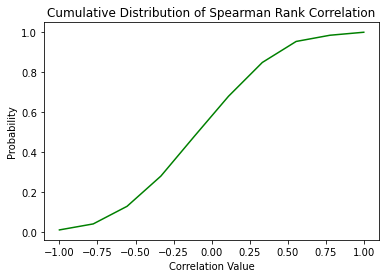

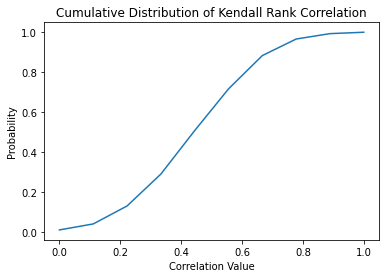

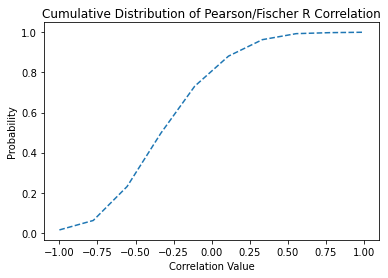

In [16]:
#Plot the CDFs
plt.plot(x1, srcarr_cdf, 'g', label='Spearman Rank Correlation')
plt.title('Cumulative Distribution of Spearman Rank Correlation')
plt.xlabel('Correlation Value')
plt.ylabel('Probability')
plt.show()

plt.plot(x2, krcarr_cdf, label='Kendall Rank Correlation')
plt.title('Cumulative Distribution of Kendall Rank Correlation')
plt.xlabel('Correlation Value')
plt.ylabel('Probability')
plt.show()

plt.plot(x1, pfrcarr_cdf, '--', label='Pearson/Fischer R Correlation')
plt.title('Cumulative Distribution of Pearson/Fischer R Correlation')
plt.xlabel('Correlation Value')
plt.ylabel('Probability')
plt.show()

The plots above show the cumulative distribution for the results of the correlation function computed on all of the 1000 dataframes. These plots give us the probability of obtaining a correlation score up to x. They help us understand how probable it is that the data is correlated, given a correlation value.

For example, looking at the Spearman Rank correlation cumulative function, the plot shows that we have an approximate probability of 0.6 to get a score lower than 0, which means more data tends to have a negative correlation, than positive correlation. The same trend can be observed in the other plots.

**c.** Now take the correlated set of data and do the same as **b)**. Interprete the results with comparing the plots of uncorrelated datasets. **20 Points**

In [17]:

#Create the cartesion product from wich we will sample
cartesian_product2 = pd.merge(corr_datax, corr_datay, how='cross')

df_list_corr = []
#Create a for loop to randomly sample the cartesian product array and get a list of 1000 dataframes each with a
#random set 20 values in x and in y.
for i in range(0,1000):
    new = cartesian_product2.sample(n=20, replace=False).reset_index(drop=True)
    #makes sure that there are no repeats in the data
    for x in df_list_corr:
        assert ~x.equals(new)
    df_list_corr.append(new)

In [18]:
#Array of values for the Spearman rank correlation
srcarr2_corr = []
#Array of values for the Spearman rank p-value
srcarr2_p = []
#Array of values for the Kendall rank correlation
krcarr2_corr = []
#Array of values for the Kendall rank p-value
krcarr2_p = []
#Array of values for the Pearson/Fischer r correlation
pfrcarr2_corr = []
#Array of values for the Pearson/Fischer r p-value
pfrcarr2_p = []

#Create a loop to calculate all the appropriate statistics and append them to their respective list
for i in range(0,len(df_list_corr)):
    #Spearman rank correlation
    src2 = sp.spearmanr(df_list_corr[i].x, df_list_corr[i].y)
    #Kendall rank correlation
    krc2 = sp.kendalltau(df_list_corr[i].x, df_list_corr[i].y)
    #Pearson/Fischer r correlation
    pfrc2 = sp.pearsonr(df_list_corr[i].x, df_list_corr[i].y)
    #Append to the appropriate array
    srcarr2_corr.append(src2[0])
    srcarr2_p.append(src2[1])
    krcarr2_corr.append(krc2[0])
    krcarr2_p.append(krc2[1])
    pfrcarr2_corr.append(pfrc2[0])
    pfrcarr2_p.append(pfrc2[1])

In [19]:
print('Length of Speaman rank correlation array: ' + str(len(srcarr2_corr)))
print('Length of Speaman rank p-value array: ' + str(len(srcarr2_p)))
print('Length of Kendall rank correlation array: ' + str(len(krcarr2_corr)))
print('Length of Kendall rank p-value array: ' + str(len(krcarr2_p)))
print('Length of Pearson/Fischer r correlation array: ' + str(len(pfrcarr2_corr)))
print('Length of Pearson/Fischer r p-value array: ' + str(len(pfrcarr2_p)) + '\n')

Length of Speaman rank correlation array: 1000
Length of Speaman rank p-value array: 1000
Length of Kendall rank correlation array: 1000
Length of Kendall rank p-value array: 1000
Length of Pearson/Fischer r correlation array: 1000
Length of Pearson/Fischer r p-value array: 1000



In [20]:
#Get the CDF for the appropriate data
srcarr2_cdf = cdf(srcarr2_corr)
krcarr2_cdf = cdf(krcarr2_corr)
pfrcarr2_cdf = cdf(pfrcarr2_corr)

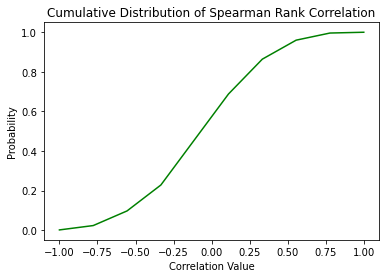

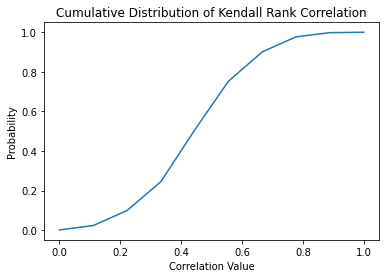

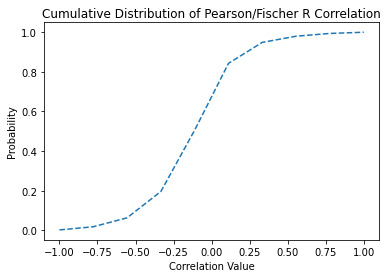

In [21]:
#Plot the CDFs
plt.plot(x1, srcarr2_cdf, 'g')
plt.title('Cumulative Distribution of Spearman Rank Correlation')
plt.xlabel('Correlation Value')
plt.ylabel('Probability')
plt.show()

plt.plot(x2, krcarr2_cdf)
plt.title('Cumulative Distribution of Kendall Rank Correlation')
plt.xlabel('Correlation Value')
plt.ylabel('Probability')
plt.show()

plt.plot(x1, pfrcarr2_cdf, '--')
plt.title('Cumulative Distribution of Pearson/Fischer R Correlation')
plt.xlabel('Correlation Value')
plt.ylabel('Probability')
plt.show()

In these plots, we can once again find a trend for negative correlation in the data, even more importantly found in the Pearson correlation function. For Spearman and Kendall, the plots for correlated and uncorrelated data are very similar, therefore showing that the correlated data is in fact not as correlated as one might have thought.
To further demonstrate the similarity between the graphs, we plot the correlated data on top of the uncorrelated data below.

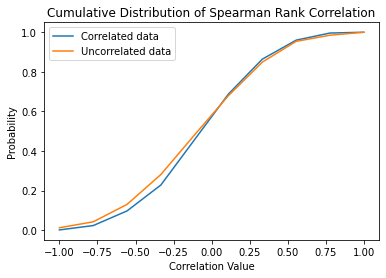

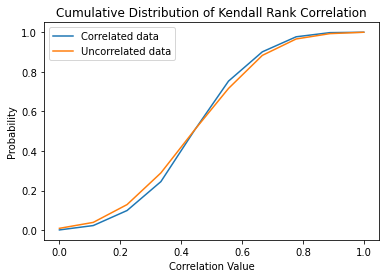

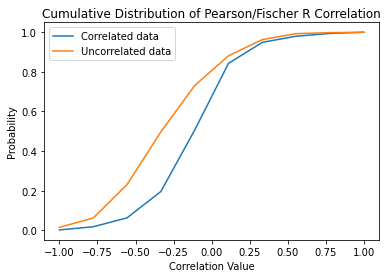

In [22]:
plt.plot(x1, srcarr2_cdf, label = 'Correlated data')
plt.plot(x1, srcarr_cdf, label = 'Uncorrelated data')
plt.title('Cumulative Distribution of Spearman Rank Correlation')
plt.xlabel('Correlation Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

plt.plot(x2, krcarr2_cdf, label = 'Correlated data')
plt.plot(x2, krcarr_cdf, label = 'Uncorrelated data')
plt.title('Cumulative Distribution of Kendall Rank Correlation')
plt.xlabel('Correlation Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

plt.plot(x1, pfrcarr2_cdf, label = 'Correlated data')
plt.plot(x1, pfrcarr_cdf, label = 'Uncorrelated data')
plt.title('Cumulative Distribution of Pearson/Fischer R Correlation')
plt.xlabel('Correlation Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

In order to further explore the correlation between values, we can visually inspect the data to see if these results make sense. 

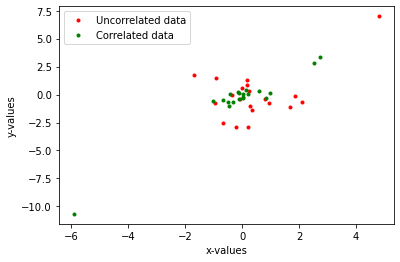

In [23]:
#Visualise all the data
plt.plot(uncorr_datax, uncorr_datay, '.r', label = 'Uncorrelated data')
plt.plot(corr_datax, corr_datay, '.g', label = 'Correlated data')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.legend()

Here we can see that although there might be a slight correlation in the correlated data, it is actually not very strong, as predicted from our previous results. The correlated data has a significant spread and even the presence of an extreme outlier (bottom left). We can see that the uncorrelated data has somewhat of a spread, however the difference between the two types of data is not significant enough to show clear difference in our plots above. Noteably though, we do see that the Pearson correlation differs more than the other distributions which is consistant with the fact that the Pearson correlation does not handle outliers well.